In [1]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
feature_names = data.iloc[:, 1:30].columns
target = data.iloc[:1, 30:].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [6]:
data_features = data[feature_names]
data_target = data[target]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data_features, data_target, train_size = 0.7, test_size = 0.3, random_state = 1)

Model 1: Logistic regression

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [10]:
pred = model.predict(X_test)

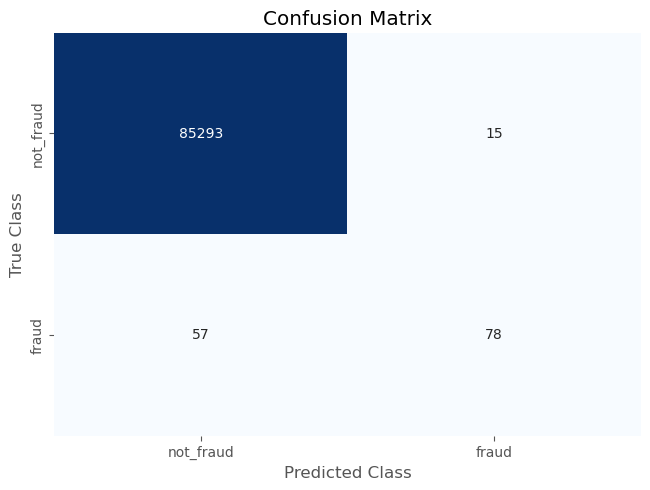

In [11]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(Y_test, pred)
df = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(df, annot=True, cbar=None, cmap='Blues', fmt= 'g')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [12]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(Y_test, pred), 2)
recall_score = round(recall_score(Y_test, pred), 2)
print("Sensitivity/ Recall value for the logistic regression:{recall_score}".format(recall_score = recall_score))
print("F1 value for the logistic regression:{f1_score}".format(f1_score = f1_score))

Sensitivity/ Recall value for the logistic regression:0.58
F1 value for the logistic regression:0.68


Model 2: SVM

In [13]:
from sklearn.svm import SVC

In [14]:
svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train.values.ravel())
prep_svm = svm_classifier.predict(X_test)

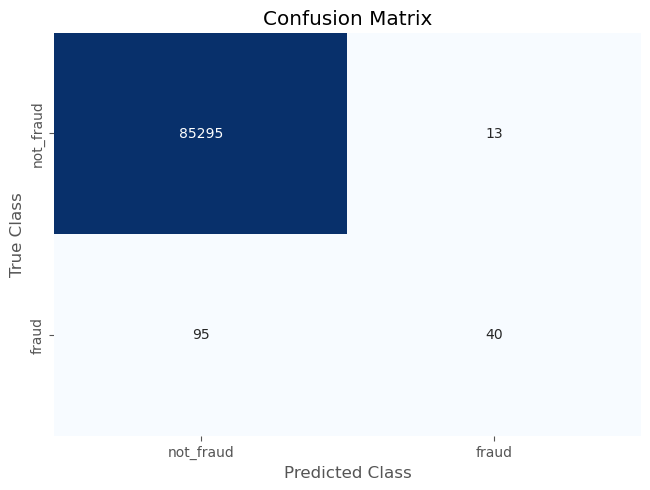

In [15]:
matrix_svm = confusion_matrix(Y_test, prep_svm)
df1 = pd.DataFrame(matrix_svm, index = class_names, columns = class_names)
sns.heatmap(df1, annot=True, cbar=None, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [16]:
df1.head()

,not_fraud,fraud
not_fraud,85295,13
fraud,95,40


In [17]:
tn, fp, fn, tp = confusion_matrix(Y_test, prep_svm).ravel()

In [18]:
Recall_svm = round((tp/(tp + fn)), 2)
Precision_svm = round((tp/(tp + fp)), 2)
f1 = round(((2 * Precision_svm * Recall_svm)/(Precision_svm + Recall_svm)), 2)

In [19]:
print("Recall value of SVM is: {Recall_svm}".format(Recall_svm = Recall_svm))
print("F1 value of SVM is: {f1}".format(f1 = f1))

Recall value of SVM is: 0.3
F1 value of SVM is: 0.43


Model 3: Decision Tree


In [20]:
from sklearn import tree

In [21]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, Y_train.values.ravel())

DecisionTreeClassifier()

In [23]:
pred_dtree = dtree.predict(X_test)

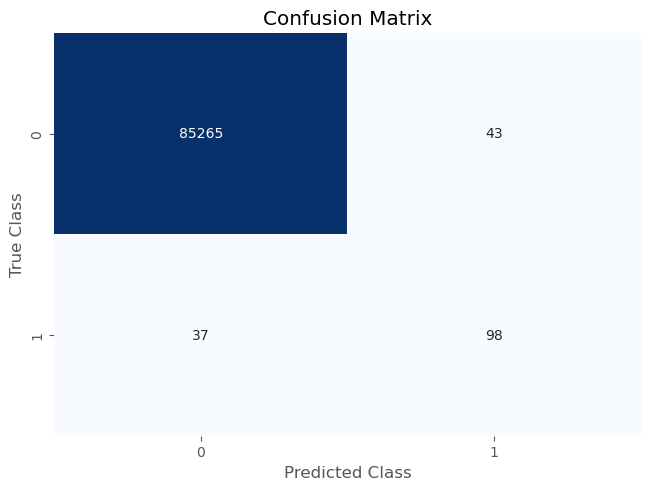

In [24]:
matrix_dtree = confusion_matrix(Y_test, pred_dtree)
sns.heatmap(matrix_dtree, annot=True, cbar=None, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [27]:
tn1, fp1, fn1, tp1 = matrix_dtree.ravel()
recall_dtree = round((tp1/(tp1+fn1)), 2)
precision_dtree = round((tp1/(tp1+fp1)), 2)
f1_dtree = round(((2*recall_dtree*precision_dtree)/(recall_dtree+precision_dtree)), 2)

In [28]:
print("Recall value for decision tree classifier: {recall_dtree}".format(recall_dtree = recall_dtree))
print("F1 value for decision tree classifier: {f1_dtree}".format(f1_dtree = f1_dtree))

Recall value for decision tree classifier: 0.73
F1 value for decision tree classifier: 0.71
